<div style="font-size:18pt; padding-top:20px; text-align:center">ДОМАШНЕЕ ЗАДАНИЕ 2. <b>Выбор модели.</b> </div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

Подключение стилей оформления

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="0"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Цель работы (Содержание)</div>
    </div>
</div>

<ul dir="auto">
<li>реализация собственных классов совместимых с библиотекой <code>sklearn</code></li>
<li>использование полиномиальной транcформации в моделях регрессии и классификации</li>
<li>использование регуляризации в моделях регрессии и классификации</li>
<li>выбор гиперпараметров и интерпретация кривых обучения</li>
</ul>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Вариант</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Комиссаров"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с последующими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 1. Реализация собственных классов и функций</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

Подключение библиотек

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = True

import warnings
warnings.filterwarnings('ignore')

import requests

Загрузка набора данных

In [4]:
url = 'https://raw.githubusercontent.com/MLMethods/Assignments/master/data/A2_Model_Selection/Reg_A5.csv'
res = requests.get(url, allow_redirects=True)
with open('Hw2Part1.csv','wb') as file:
    file.write(res.content)
Hw2Part1 = pd.read_csv('Hw2Part1.csv')
Hw2Part1.head(4)

,X,Y
0,3.856603,9.209759
1,0.103760,10.409240
2,3.168241,7.643742
3,3.744019,8.453341


In [5]:
X = Hw2Part1.drop('Y', axis=1).values
#Y = Hw2Part1.drop('X', axis=1).values выдает неправильные значения при подсчете MSE & R^2
Y = Hw2Part1['Y'].values
print (" Размерность Х =", X.shape);
print (" Размерность Y =", Y.shape);

 Размерность Х = (300, 1)
 Размерность Y = (300,)


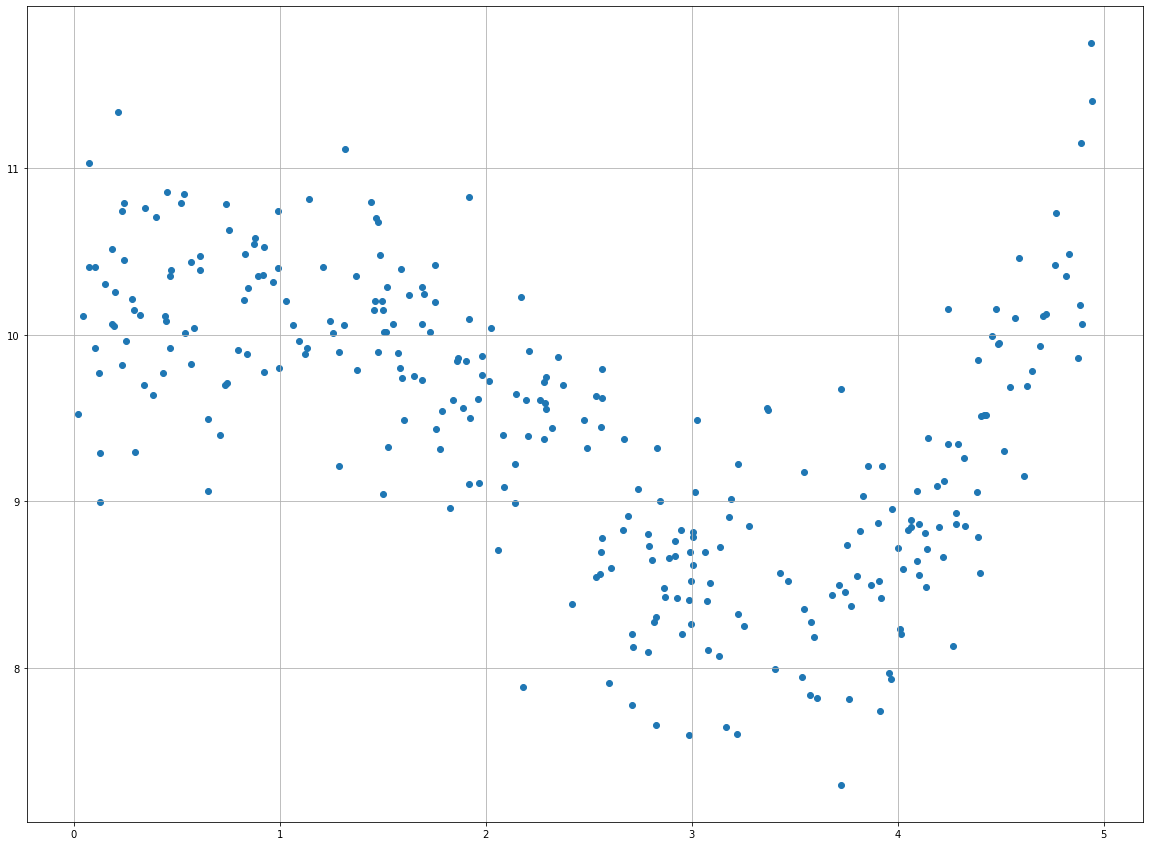

In [6]:
plt.figure(figsize=(20,15)) 
plt.scatter(Hw2Part1['X'], Hw2Part1['Y'])

<strong>1.1 Реализуйте класс, предназначенный для оценки параметров линейной регрессии с регуляризацией совместимый с sklearn. </strong> <p> Передаваемые параметры: коэффициент регуляризации (alpha). Использовать метод наименьших квадратов с регуляризацией.</p>

<img loading="lazy" width="377" height="94" src="http://your-scorpion.ru/wp-content/uploads/2019/11/Frame-2.png" alt="" class="wp-image-13196">

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [8]:
# Разметка данных
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((225, 1), (225,), (75, 1), (75,))

In [9]:
class CustomLinearRegression(RegressorMixin, BaseEstimator):
    
    def __init__(self, method='ols'):
        self.method = method
    
    def fit(self, X, Y, alpha):
        X, Y = check_X_y(X, Y)
        X_ = np.c_[np.ones(X.size), X]
        one = np.identity(X_.shape[1]) # квадратный массив с единицами на главной диагонали
        one[0,0] = 0 
        try:
            self.coef_ = np.linalg.pinv(X_.T @ X_ + alpha*one) @ X_.T @ Y
        except:
            raise ValueError
        return self
    
    def predict(self, X):
        check_is_fitted(self, 'coef_')
        X = check_array(X)
        X_ = np.c_[np.ones(X.size), X]
        return X_ @ self.coef_

In [10]:
# Используем коэффициент регуляризации alpha
model = CustomLinearRegression()
model.fit(X_train, y_train, alpha=0.5)
model.coef_

array([10.13214529, -0.29223974])

In [11]:
y_pred_alpha = model.predict(X_test)
y_pred_alpha

array([ 8.70443623,  9.30032668,  8.97523102,  9.86201707,  9.46313619,
        9.30582719,  8.95555422,  8.97150194,  8.86740095,  9.61831092,
        9.09637487,  9.34580485,  9.52208149,  9.5943852 ,  9.38352331,
        9.71095019, 10.07474683,  8.76078959,  9.88929094, 10.03127387,
        9.49796462, 10.04619413,  8.84907164,  9.33957869,  9.87491276,
        9.19984928,  9.31782598, 10.09522965,  8.75239279,  9.91128216,
        8.78001506,  9.83121105,  9.03799405,  9.38373064,  9.67197457,
        8.70189605,  9.6941804 ,  9.53980561,  9.58662027,  9.00509259,
        9.81247981,  8.68902826,  9.80078439, 10.05838739, 10.04940024,
       10.06109012,  9.00142549,  9.09864486,  9.28737311,  9.63576464,
        9.04695018,  9.11823405,  8.92127724,  9.20210528,  8.89798933,
        8.81995336,  9.70565637,  9.63726779, 10.06385   ,  9.40878089,
        8.93234679,  8.84853168, 10.04440001,  9.87670746,  8.90727896,
        9.99996621,  9.46216494,  9.84268088,  9.04375089,  9.58

<strong>1.2 Реализуйте класс для стандартизации признаков в виде трансформации совместимый с sklearn.</strong> <p>Передаваемые параметры: 1)<strong> has_bias </strong>(содержит ли матрица вектор единиц), 2)<strong> apply_mean </strong> (производить ли центровку)</p>
<p>Используйте класс <strong> Pipeline </strong>, чтобы выполнить обучение линейной регрессии для набора данных с коэффициентом регуляризации равным <strong> 0.01. </strong></p>

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
class CustomStandardTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, has_bias, apply_mean):
        self.has_bias = has_bias
        self.apply_mean = apply_mean 
    
    def fit(self, X, Y=None):
        X = check_array(X)
        return self
    
    
    def transform(self, X, Y=None):
        X = check_array(X)
        if self.apply_mean:
            meanPoint = X.mean(axis = 0)
            X -= meanPoint
            
        if not self.has_bias:
            X = np.c_[np.ones(X.size), X]
            
        return X

In [14]:
pipeline = Pipeline([
    ("standartizer", CustomStandardTransformer(has_bias=True, apply_mean = True )), # Испольуется отцентровка 
    ("regressor", CustomLinearRegression())
])
pipeline.fit(X_train, y_train, regressor__alpha=0.01)

Pipeline(steps=[('standartizer',
                 CustomStandardTransformer(apply_mean=True, has_bias=True)),
                ('regressor', CustomLinearRegression())])

In [15]:
y_pred_has_bias = pipeline.predict(X_test)
y_pred_has_bias

array([ 8.71583815,  9.31239288,  8.98693481,  9.87470943,  9.47538389,
        9.31789952,  8.96723608,  8.98320158,  8.87898454,  9.6307316 ,
        9.10821371,  9.35792175,  9.53439489,  9.6067792 ,  9.39568225,
        9.72347414, 10.08767633,  8.77225433,  9.9020137 , 10.04415491,
        9.51025114, 10.0590918 ,  8.86063479,  9.35168865,  9.8876195 ,
        9.21180347,  9.32991169, 10.10818199,  8.76384817,  9.92402944,
        8.79150123,  9.84386907,  9.04976781,  9.39588981,  9.68445507,
        8.71329514,  9.70668566,  9.55213878,  9.59900562,  9.01682967,
        9.82511695,  8.700413  ,  9.81340848, 10.07129866, 10.06230149,
       10.0740044 ,  9.01315848,  9.11048623,  9.29942487,  9.64820478,
        9.05873393,  9.13009725,  8.93292088,  9.21406198,  8.90960702,
        8.83148405,  9.71817442,  9.64970961, 10.07676735,  9.42096799,
        8.94400278,  8.86009423, 10.05729569,  9.8894162 ,  8.918907  ,
       10.01281235,  9.47441156,  9.85535168,  9.05553107,  9.59

<strong> 1.3 Реализуйте функции для расчета MSE и R^2 при отложенной выборке (run_holdout) и кросс-валидации (run_cross_val).</strong>
<p> Для кросс-валидации используйте только класс KFold. Выходными значениями должны быть MSE и R^2 для обучающей и тестовой частей. </strong></p>

In [16]:
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
def run_holdout(model, X, Y, train_size, random_state, clr=False) -> dict: # clr = True для CustmLinearRegression()
    X_holdout, X_test, y_holdout, y_test = train_test_split(X, Y, train_size=train_size, random_state=random_state)
    splitter = ShuffleSplit(n_splits=1, test_size=0.25)
    splits = splitter.split(X_holdout, y_holdout)
    for train_index, test_index in splits:
        if clr == True:
            model.fit(X_holdout[train_index], y_holdout[train_index], regressor__alpha=0.01)
        else:
            model.fit(X_holdout[train_index], y_holdout[train_index])

        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_holdout[train_index]) 

        MSE = np.square(np.subtract(y_test, y_pred)).mean() # на тестовом множестве
        MSE_train = np.square(np.subtract(y_holdout[train_index], y_pred_train)).mean() # на обучающем множестве
        MSE_sklearn=mean_squared_error(y_test, y_pred) # черещ sklearn

        Rpow2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)) #на проверочном
        Rpow2_train = 1 - (np.sum((y_holdout[train_index] - y_pred_train) ** 2) / np.sum((y_holdout[train_index] - np.mean(y_holdout[train_index])) ** 2))
        Rpow2_sklearn = r2_score(y_test, y_pred)
        scores = {'MSE для обучающего множества': MSE_train,
                  'MSE для тестового множества': MSE,  
                  'MSE от sklearn': MSE_sklearn, 
                  'R^2 для тестового множества': Rpow2_train,
                  'R^2 для обучающего множества': Rpow2,                    
                  'R^2 от sklearn': Rpow2_sklearn}
    return scores 


def run_cross_val(model, X, Y, n_splits, shuffle, random_state, clr=False) -> dict: # clr = True для CustmLinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=random_state)
    kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    splits = kf.split(X_train, y_train)
    i=1
    scores = {}
    for train_index, test_index in splits:
        if clr == True:
            model.fit(X_train[train_index], y_train[train_index], regressor__alpha=0.01)
        else:
            model.fit(X_train[train_index], y_train[train_index])
        
        y_pred = model.predict(X_test)        
        y_pred_train = model.predict(X[train_index])
        
        MSE = np.square(np.subtract(y_test, y_pred)).mean()
        MSE_train = np.square(np.subtract(Y[train_index], y_pred_train)).mean()
        MSE_sklearn = mean_squared_error(y_test, y_pred)
        
        Rpow2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)) # для проверочного
        Rpow2_train = 1 - (np.sum((Y[train_index] - y_pred_train) ** 2) / np.sum((Y[train_index] - np.mean(y_train)) ** 2))
        Rpo2_sklearn = r2_score(y_test, y_pred)
        
        scores[f'MSE для обучающего множества[{i}]'] = MSE_train
        scores[f'MSE для тестового множества[{i}]'] = MSE        
        scores[f'MSE от sklearn[{i}]'] = MSE_sklearn        
        scores[f'R^2 для обучающего множества[{i}]'] = Rpow2_train
        scores[f'R^2 для тестового множества[{i}]'] = Rpow2
        scores[f'R^2 от sklearn[{i}]']= Rpo2_sklearn
        i+=1
    return scores

In [18]:
run_holdout(pipeline, X, Y, train_size=0.75, random_state=0, clr=True)

{'MSE для обучающего множества': 0.5267014237577781,
 'MSE для тестового множества': 0.6632129513498012,
 'MSE от sklearn': 0.6632129513498012,
 'R^2 для тестового множества': 0.21821044350686003,
 'R^2 для обучающего множества': 0.11548870949260281,
 'R^2 от sklearn': 0.11548870949260281}

In [19]:
run_cross_val(pipeline, X, Y, n_splits=4, shuffle=True, random_state=0, clr=True)

{'MSE для обучающего множества[1]': 0.506418997325498,
 'MSE для тестового множества[1]': 0.673927786208396,
 'MSE от sklearn[1]': 0.673927786208396,
 'R^2 для обучающего множества[1]': 0.30105822447568054,
 'R^2 для тестового множества[1]': 0.10119858987256147,
 'R^2 от sklearn[1]': 0.10119858987256147,
 'MSE для обучающего множества[2]': 0.5233359570792333,
 'MSE для тестового множества[2]': 0.6649052878444051,
 'MSE от sklearn[2]': 0.6649052878444051,
 'R^2 для обучающего множества[2]': 0.28067178061918774,
 'R^2 для тестового множества[2]': 0.11323168068493505,
 'R^2 от sklearn[2]': 0.11323168068493505,
 'MSE для обучающего множества[3]': 0.5857746990855126,
 'MSE для тестового множества[3]': 0.6602477775154787,
 'MSE от sklearn[3]': 0.6602477775154787,
 'R^2 для обучающего множества[3]': 0.2737429404259457,
 'R^2 для тестового множества[3]': 0.11944329109333518,
 'R^2 от sklearn[3]': 0.11944329109333518,
 'MSE для обучающего множества[4]': 0.5369018212107146,
 'MSE для тестового м

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 2. Регрессия и кросс-валидация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

Долее будут использованы реализованные ранее классы

<strong>2.1</strong> Необходимо разбить исходные данные на обучающее и тестовое подмножества в соотношении 70 на 30, <strong>random_state=0</strong>

In [20]:
# Разметка данных
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((210, 1), (210,), (90, 1), (90,))

<p><strong>2.2 </strong>Необходимо построить</p>
<ul>
<li>диаграмму разброса исходных данных</li>
<li>график зависимости среднеквадратической ошибки (<code>MSE</code>) от степени полинома для обучающего и проверочного подмножеств</li>
<li>график зависимости коэффициента детерминации (<code>R^2</code>) от степени полинома для обучающего и проверочного подмножеств</li>
<li>функцию регрессии (наилучший случай) + исходные данные</li>
</ul>

<strong> Примечание! </strong> Для выбора гиперпараметров используйте два подхода: 1) с отложенной выборкой, 2) с кросс-валидацией

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
#функция для построения графика полиномиальной регрессии
def PolynomCoef(x, coef):
    o = len(coef)
    z = 0
    for i in range(o):
        z += coef[i]*x**i
    return z

In [23]:
url = 'https://raw.githubusercontent.com/MLMethods/Assignments/master/data/A2_Model_Selection/Reg_A5.csv'
res = requests.get(url, allow_redirects=True)
with open('Hw2Part2.csv','wb') as file:
    file.write(res.content)
Hw2Part2 = pd.read_csv('Hw2Part2.csv')
Hw2Part2.head(4)

,X,Y
0,3.856603,9.209759
1,0.103760,10.409240
2,3.168241,7.643742
3,3.744019,8.453341


In [24]:
X = Hw2Part2.drop('Y', axis=1).values
Y = Hw2Part2['Y'].values
print (" Размерность Х =", X.shape);
print (" Размерность Y =", Y.shape);

 Размерность Х = (300, 1)
 Размерность Y = (300,)


In [25]:
# Подготовка (инициализация переменных) для отложенной выборки
maxvalue=25
MSE_array=[]
MSE_train_array=[]
Rpow2_array=[]
Rpow2_train_array=[]

# реализация функции hold-out
for d in range(1,maxvalue+1):
    X_poly=PolynomialFeatures(degree=d).fit_transform(X)
    lr=LinearRegression(fit_intercept=False)
    
    MSE = run_holdout(lr, X_poly, Y, train_size=0.7, random_state=0, clr=False)['MSE для тестового множества']
    MSE_train = run_holdout(lr, X_poly, Y, train_size=0.7, random_state=0, clr=False)['MSE для обучающего множества']
    
    Rpow2 = run_holdout(lr, X_poly, Y, train_size=0.7, random_state=0, clr=False)['R^2 для тестового множества']
    Rpow2_train = run_holdout(lr, X_poly, Y, train_size=0.7, random_state=0, clr=False)['R^2 для обучающего множества']
    
    MSE_array.append(MSE)
    MSE_train_array.append(MSE_train)
    
    Rpow2_array.append(Rpow2)
    Rpow2_train_array.append(Rpow2_train)
  
best_value_MSE = np.argmin(MSE_array)
best_value_Rpow2 = np.argmax(Rpow2_array)

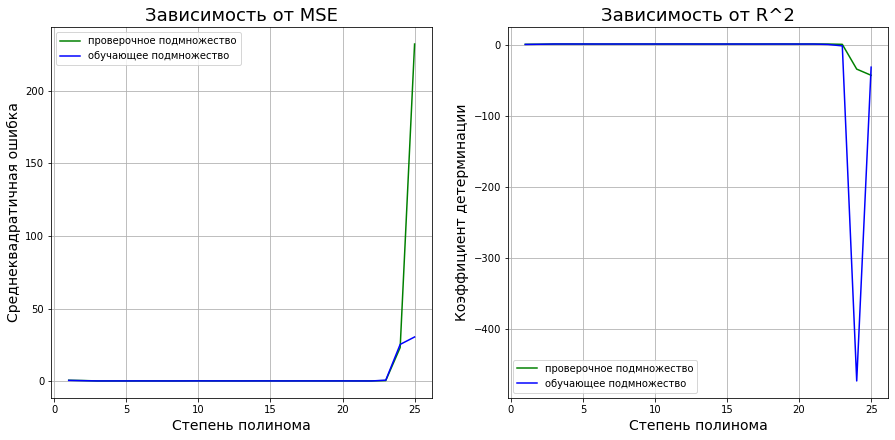

In [26]:
fig,ax=plt.subplots(2, 2, figsize=(15,15))
ax[0,0].plot(range(1,maxvalue+1),MSE_array, color='green', label='проверочное подмножество')
ax[0,0].plot(range(1,maxvalue+1),MSE_train_array, color='blue', label='обучающее подмножество')
ax[0,0].set_xlabel('Степень полинома',fontsize=14)
ax[0,0].set_ylabel('Среднеквадратичная ошибка',fontsize=14)
ax[0,0].set_title('Зависимость от MSE',fontsize=18)
ax[0,0].legend()


ax[0,1].plot(range(1,maxvalue+1),Rpow2_array, color='green', label='проверочное подмножество')
ax[0,1].plot(range(1,maxvalue+1),Rpow2_train_array, color='blue', label='обучающее подмножество')
ax[0,1].set_xlabel('Степень полинома',fontsize=14)
ax[0,1].set_ylabel('Коэффициент детерминации',fontsize=14)
ax[0,1].set_title('Зависимость от R^2',fontsize=18)
ax[0,1].legend()

fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

In [27]:
X_poly_train=PolynomialFeatures(degree=best_value_MSE+1).fit_transform(X_train)
X_poly_test=PolynomialFeatures(degree=best_value_MSE+1).fit_transform(X_test)
lr=LinearRegression(fit_intercept=False)
lr=lr.fit(X_poly_train,y_train)
y_pred=lr.predict(X_poly_test)

x = np.linspace(0,5,100)
f_pred = PolynomCoef(x, lr.coef_)

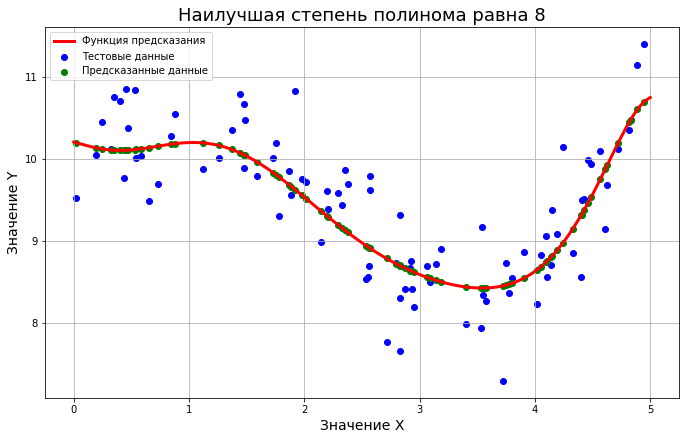

In [28]:
fig,ax=plt.subplots(2, 2, figsize=(25,15))
ax[0,0].scatter(X_test, y_test, color="blue", label="Тестовые данные")
ax[0,0].scatter(X_test, y_pred, color="green", label="Предсказанные данные")
ax[0,0].plot(x, f_pred, color='red', linewidth=3, label="Функция предсказания")
ax[0,0].set_xlabel('Значение X',fontsize=14)
ax[0,0].set_ylabel('Значение Y',fontsize=14)
ax[0,0].set_title(f'Наилучшая степень полинома равна {best_value_MSE+1}',fontsize=18)
ax[0,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

In [29]:
print(f'Наилучшая степень полинома равна {best_value_MSE+1}')
print(f'Среднее значение MSE на тестовом подмножестве = {np.mean(MSE_array[:23])}')
print(f'Среднее значение MSE на обучающем подмножестве = {np.mean(MSE_train_array[:23])}')
print(f'Среднее значение коэффициента детерминации на тестовом подмножестве = {np.mean(Rpow2_array[:23])}')
print(f'Среднее значение коэффициента детерминации на обучающем подмножестве = {np.mean(Rpow2_train_array[:23])}')

Наилучшая степень полинома равна 8
Среднее значение MSE на тестовом подмножестве = 0.28074349894392325
Среднее значение MSE на обучающем подмножестве = 0.26287816887202614
Среднее значение коэффициента детерминации на тестовом подмножестве = 0.6401544813737629
Среднее значение коэффициента детерминации на обучающем подмножестве = 0.5123932731039301


In [30]:
# Подготовка (инициализация переменных) для кросс-валидации

maxvalue=25
MSE_array=[]
MSE_train_array=[]
Rpow2_array=[]
Rpow2_train_array=[]

for d in range(1,maxvalue+1):
    X_poly=PolynomialFeatures(degree=d).fit_transform(X)
    lr=LinearRegression(fit_intercept=False)
    n_splits=4 # разбиваем на 4 части, на которых обучаем и тестируем модель
    temp_MSE_cv=[]
    temp_MSE_train_cv=[]
    temp_Rpow2_cv=[]
    temp_Rpow2_train_cv=[]
    for i in range(1, n_splits+1):
        MSE = run_cross_val(lr, X_poly, Y, n_splits, shuffle=True, random_state=0, clr=False)[f'MSE для тестового множества[{i}]']
        temp_MSE_cv.append(MSE)
        MSE_train = run_cross_val(lr, X_poly, Y, n_splits, shuffle=True, random_state=0, clr=False)[f'MSE для обучающего множества[{i}]']
        temp_MSE_train_cv.append(MSE_train)
        
        Rpow2 = run_cross_val(lr, X_poly, Y, n_splits, shuffle=True, random_state=0, clr=False)[f'R^2 для тестового множества[{i}]']
        temp_Rpow2_cv.append(Rpow2)
        Rpow2_train = run_cross_val(lr, X_poly, Y, n_splits, shuffle=True, random_state=0, clr=False)[f'R^2 для обучающего множества[{i}]']
        temp_Rpow2_train_cv.append(Rpow2_train)
        
        
    MSE_array.append(min(temp_MSE_cv)) # best mse
    MSE_train_array.append(min(temp_MSE_train_cv)) # best mse_train    
    Rpow2_array.append(max(temp_Rpow2_cv)) # best Rpow2
    Rpow2_train_array.append(max(temp_Rpow2_train_cv)) # best Rpow2


best_value_MSE_splits = np.argmin(MSE_array)
best_value_Rpow2_splits = np.argmax(Rpow2_array)

In [31]:
X.shape, Y.shape

((300, 1), (300,))

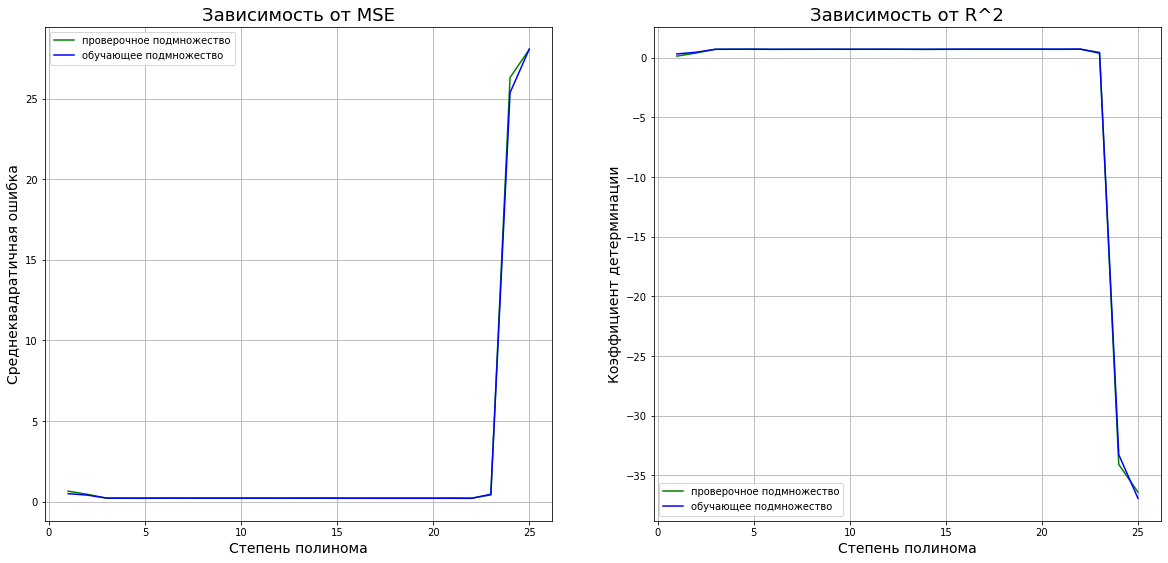

In [32]:
fig,ax=plt.subplots(2, 2, figsize=(20,20))
ax[0,0].plot(range(1,maxvalue+1),MSE_array, color='green', label='проверочное подмножество')
ax[0,0].plot(range(1,maxvalue+1),MSE_train_array, color='blue', label='обучающее подмножество')
ax[0,0].set_xlabel('Степень полинома',fontsize=14)
ax[0,0].set_ylabel('Среднеквадратичная ошибка',fontsize=14)
ax[0,0].set_title('Зависимость от MSE',fontsize=18)
ax[0,0].legend()


ax[0,1].plot(range(1,maxvalue+1),Rpow2_array, color='green', label='проверочное подмножество')
ax[0,1].plot(range(1,maxvalue+1),Rpow2_train_array, color='blue', label='обучающее подмножество')
ax[0,1].set_xlabel('Степень полинома',fontsize=14)
ax[0,1].set_ylabel('Коэффициент детерминации',fontsize=14)
ax[0,1].set_title('Зависимость от R^2',fontsize=18)
ax[0,1].legend()

fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)
X_poly_train=PolynomialFeatures(degree=best_value_MSE+1).fit_transform(X_train)
X_poly_test=PolynomialFeatures(degree=best_value_MSE+1).fit_transform(X_test)
lr=LinearRegression(fit_intercept=False)
lr=lr.fit(X_poly_train,y_train)
y_pred=lr.predict(X_poly_test)

x = np.linspace(0,5,100)
f_pred = PolynomCoef(x, lr.coef_)

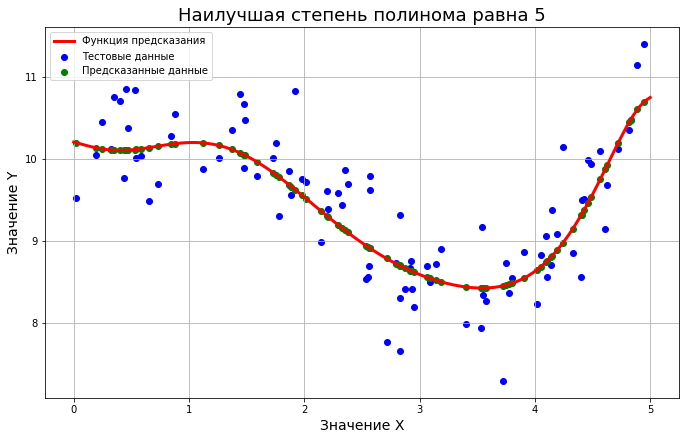

In [34]:
fig,ax=plt.subplots(2, 2, figsize=(25,15))
ax[0,0].scatter(X_test, y_test, color="blue", label="Тестовые данные")
ax[0,0].scatter(X_test, y_pred, color="green", label="Предсказанные данные")
ax[0,0].plot(x, f_pred, color='red', linewidth=3, label="Функция предсказания")
ax[0,0].set_xlabel('Значение X',fontsize=14)
ax[0,0].set_ylabel('Значение Y',fontsize=14)
ax[0,0].set_title(f'Наилучшая степень полинома равна {best_value_MSE_splits+1}',fontsize=18)
ax[0,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

In [35]:
print(f'Наилучшая степень полинома равна {best_value_MSE_splits+1}')
print(f'Среднее значение MSE на тестовом подмножестве = {np.mean(MSE_array[:23])}')
print(f'Среднее значение MSE на обучающем подмножестве = {np.mean(MSE_train_array[:23])}')
print(f'Среднее значение коэффициента детерминации на тестовом подмножестве = {np.mean(Rpow2_array[:23])}')
print(f'Среднее значение коэффициента детерминации на обучающем подмножестве = {np.mean(Rpow2_train_array[:23])}')

Наилучшая степень полинома равна 5
Среднее значение MSE на тестовом подмножестве = 0.2661094882409482
Среднее значение MSE на обучающем подмножестве = 0.2537034291813353
Среднее значение коэффициента детерминации на тестовом подмножестве = 0.6450961242822317
Среднее значение коэффициента детерминации на обучающем подмножестве = 0.6567355725019163


<strong>ВЫВОД:</strong>
<p> C ростом степени полинома:
<ul>
<li>уменьшается показатель среднеквадратичной ошибки (MSE) - хорошо для модели</li>
<li>Уведичивается значение коэффициента детерминации (R^2) - хорошо для модели</li>
</ul>
<p> Но при большом значении полинома (в данном примере уже 24+)</p>
<ul>
<li>показатель среднеквадратичной ошибки (MSE) растет с огромной скоростью - плохой показатель для модели</li>
<li> значение коэффициента детерминации (R^2) уменьшается с огромной скоростью - плохой показатель для модели</li>
</ul>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 3. Классификация и кросс-валидация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

Набор данных:
<a href="../data/A2_Model_Selection/Cl_A5_V1.csv">Вариант 1</a>

<ul>
<li>Используйте класс логистической регрессии из <code>sklearn</code> со следующими параметрами:<ul>
<li><code>penalty='l2'</code></li>
<li><code>fit_intercept=True</code></li>
<li><code>max_iter=100</code></li>
<li><code>C=1e5</code></li>
<li><code>solver='liblinear'</code></li>
<li><code>random_state=12345</code></li>
</ul>
</li>
<li>Разбейте исходные данные на обучающее и тестовое подмножества в соотношении 70 на 30, <code>random_state=0</code></li>
<li>Для выбора гиперпараметров используйте два подхода: 1) с отложенной выборкой, 2) с кросс-валидацией</li>
<li>Для кросс-валидации можно использовать функцию <code>cross_validate</code> из <code>sklearn</code></li>
<li>Параметры разбиения для выбора гиперпараметров используйте те, что в п.4 задания 1</li>
</ul>

<p> Построить </p>

<ul>
<li>диаграмму разброса исходных данных</li>
<li>график зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</li>
<li>график зависимости доли правильных классификаций от количества итераций для обучающего и проверочного подмножеств для наилучшего случая</li>
<li>результат классификации для наилучшего случая (степень полинома) для обучающего и тестового подмножеств</li>
</ul>

In [36]:
# Подключение библиотек

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [37]:
url = 'https://raw.githubusercontent.com/MLMethods/Assignments/master/data/A2_Model_Selection/Cl_A5_V1.csv'
res = requests.get(url, allow_redirects=True)
with open('Hw2Part3.csv','wb') as file:
    file.write(res.content)
Hw2Part3 = pd.read_csv('Hw2Part3.csv')
Hw2Part3

,X1,X2,Y
0,11.145485,4.790697,0
1,3.094885,4.787600,1
2,8.577163,3.914841,0
3,9.427682,5.266742,0
4,3.514624,6.213900,1
...,...,...,...
495,8.541672,7.783972,0
496,1.163040,3.720493,1
497,5.230271,3.757211,1
498,6.051527,4.859310,0


In [38]:
X = Hw2Part3.drop('Y', axis=1).values
Y = Hw2Part3['Y'].values
print (" Размерность Х =", X.shape);
print (" Размерность Y =", Y.shape);

 Размерность Х = (500, 2)
 Размерность Y = (500,)


Разбейте исходные данные на обучающее и тестовое подмножества в соотношении 70 на 30, random_state=0

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((350, 2), (350,), (150, 2), (150,))

<strong>2.1 Отложенная выборка</strong>

In [40]:
# *y_test - проверочное подмножество
# *y_train_holdout - обучающее подмножество
# *y_test_holdout - тестовое подмножество

In [41]:
maxvalue=25
best_value = 0
best_accuracy = float("-inf")
best_accuracy_holdout = float("-inf")
best_MSE = float("inf")
MSE_array=[]
accuracy_array=[] #для проверочного
accuracy_array_train=[]

lgr = LogisticRegression(penalty='l2',
                         fit_intercept=True, 
                         max_iter=100, 
                         C=1e5, 
                         solver='liblinear', 
                         random_state=12345)

X_train_holdout, X_test_holdout, y_train_holdout, y_test_holdout = train_test_split(X_train,
                                                                                    y_train,
                                                                                    test_size=0.7,
                                                                                    random_state=0)

In [42]:
for d in range(1,maxvalue+1):
    
    X_test_poly=PolynomialFeatures(degree=d).fit_transform(X_test)
    X_train_holdout_poly=PolynomialFeatures(degree=d).fit_transform(X_train_holdout)
    X_test_holdout_poly=PolynomialFeatures(degree=d).fit_transform(X_test_holdout)
    
    lgr.fit(X_train_holdout_poly, y_train_holdout)
    y_pred_holdout = lgr.predict(X_test_holdout_poly)        #на тестовом подмножествe
    y_pred_holdout_train = lgr.predict(X_train_holdout_poly) #на тренировочном подмножествe
    y_pred_test = lgr.predict(X_test_poly)                   #на проверочном подмножествe
    
    MSE_avg = mean_squared_error(y_test, y_pred_test)
    MSE_array.append(MSE_avg)
    
    accuracy_avg = accuracy_score(y_test, y_pred_test)
    accuracy_array.append(accuracy_avg)
    accuracy_avg_train = accuracy_score(y_train_holdout, y_pred_holdout_train)
    accuracy_array_train.append(accuracy_avg_train)
    accuracy_avg_holdout = accuracy_score(y_test_holdout, y_pred_holdout)
    
    if best_MSE > MSE_avg:
        best_MSE = MSE_avg
        best_value = d
        
    if best_accuracy < accuracy_avg:
        best_accuracy = accuracy_avg

    if best_accuracy_holdout < accuracy_avg_holdout:
        best_accuracy_holdout = accuracy_avg_holdout    

In [43]:
print(f'Наилучшее accuracy(проверочное) = {best_accuracy}')
print(f'Наилучшее accuracy(тестовое) = {best_accuracy_holdout}')
print(f'Наилучшее MSE(проверочное) = {best_MSE}')
print(f'Наилучшее degree = {best_value}')

Наилучшее accuracy(проверочное) = 0.8533333333333334
Наилучшее accuracy(тестовое) = 0.8693877551020408
Наилучшее MSE(проверочное) = 0.14666666666666667
Наилучшее degree = 1


диаграммa разброса исходных данных

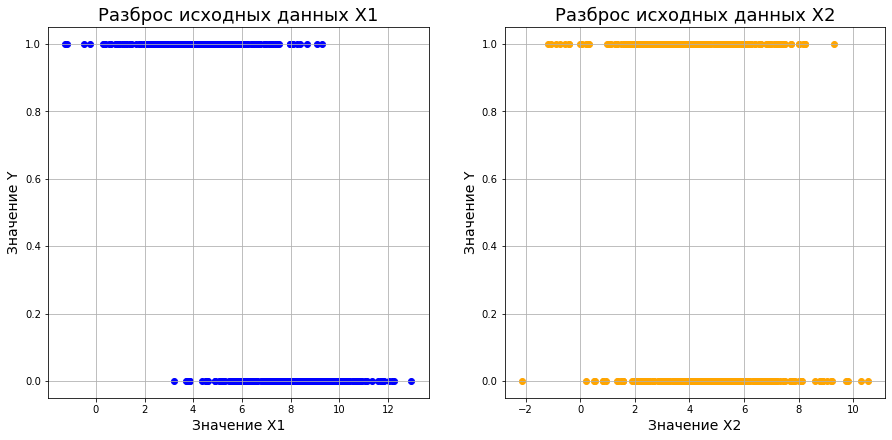

In [44]:
fig,ax=plt.subplots(2, 2, figsize=(15,15))

ax[0,0].scatter(Hw2Part3['X1'], Y, color="blue")
ax[0,0].set_xlabel('Значение X1',fontsize=14)
ax[0,0].set_ylabel('Значение Y',fontsize=14)
ax[0,0].set_title('Разброс исходных данных X1',fontsize=18)

ax[0,1].scatter(Hw2Part3['X2'], Y, color="orange")
ax[0,1].set_xlabel('Значение X2',fontsize=14)
ax[0,1].set_ylabel('Значение Y',fontsize=14)
ax[0,1].set_title('Разброс исходных данных X2',fontsize=18)

fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

График зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств

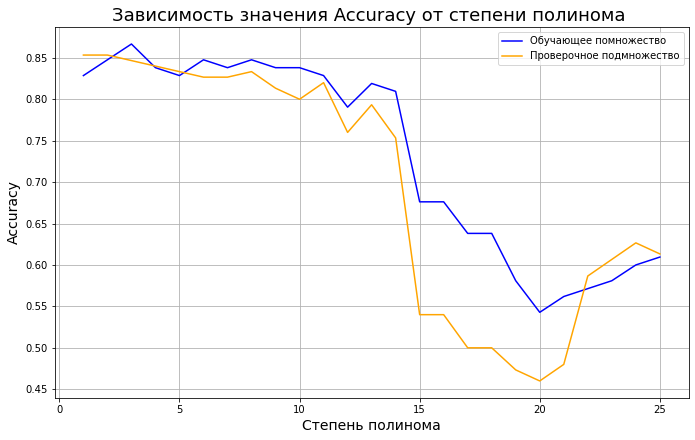

In [45]:
fig,ax=plt.subplots(2, 2, figsize=(25,15))

ax[0,0].plot(range(1,maxvalue+1),accuracy_array_train, color='blue', label='Обучающее помножество')
ax[0,0].plot(range(1,maxvalue+1),accuracy_array, color='orange', label='Проверочное подмножество')
ax[0,0].set_xlabel('Степень полинома',fontsize=14)
ax[0,0].set_ylabel('Accuracy',fontsize=14)
ax[0,0].set_title('Зависимость значения Accuracy от степени полинома ',fontsize=18)
ax[0,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

In [46]:
accuracy_array_itter=[]
accuracy_array_itter_train=[]
maxiter=100
for i in range(1,maxiter+1):
    lgr_itter = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=i, C=1e5, solver='liblinear', random_state=12345)
    lgr_itter.fit(X_train_holdout_poly,y_train_holdout)
    y_pred_holdout = lgr_itter.predict(X_test_holdout_poly)        #на тестовом подмножествe
    y_pred_holdout_train = lgr_itter.predict(X_train_holdout_poly) #на тренировочном подмножествe
    y_pred_test = lgr_itter.predict(X_test_poly)                   #на проверочном подмножествe

    accuracy_array_itter.append(accuracy_score(y_test, y_pred_test))
    accuracy_array_itter_train.append(accuracy_score(y_train_holdout, y_pred_holdout_train))

Value =  {1}


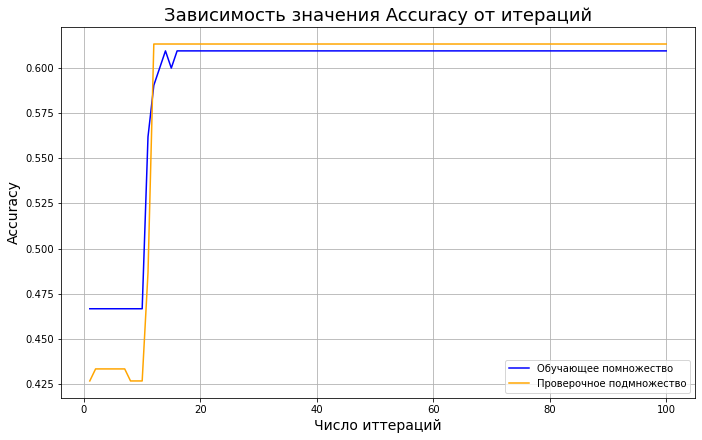

In [47]:
fig,ax=plt.subplots(2, 2, figsize=(25,15))
print ('Value = ',{best_value})

ax[0,0].plot(range(1,maxiter+1),accuracy_array_itter_train, color='blue', label='Обучающее помножество')
ax[0,0].plot(range(1,maxiter+1),accuracy_array_itter, color='orange', label='Проверочное подмножество')
ax[0,0].set_xlabel('Число иттераций',fontsize=14)
ax[0,0].set_ylabel('Accuracy',fontsize=14)
ax[0,0].set_title(f'Зависимость значения Accuracy от итераций',fontsize=18)
ax[0,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

результат классификации для наилучшего случая (степень полинома) для обучающего и тестового подмножеств

In [48]:
X_test_poly=PolynomialFeatures(degree=best_value).fit_transform(X_test)
X_train_holdout_poly=PolynomialFeatures(degree=best_value).fit_transform(X_train_holdout)
X_test_holdout_poly=PolynomialFeatures(degree=best_value).fit_transform(X_test_holdout)

lgr.fit(X_train_holdout_poly, y_train_holdout)
y_pred_holdout = lgr.predict(X_test_holdout_poly)        # предсказание на тестовом подмножествe
y_pred_holdout_train = lgr.predict(X_train_holdout_poly) # предсказание на тренировочном подмножествe
y_pred_test = lgr.predict(X_test_poly)                   # предсказание на проверочном подмножествe

Polynomial logistic regression with degree =  {1}


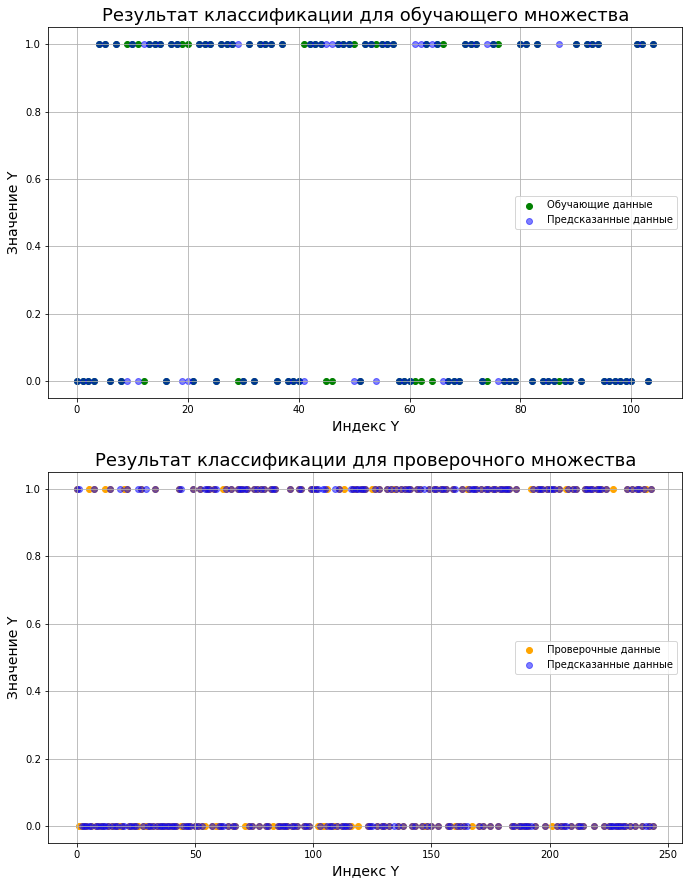

In [49]:
fig,ax=plt.subplots(2, 2, figsize=(25,15))
print ('Polynomial logistic regression with degree = ',{best_value})

ax[0,0].scatter(range(len(y_train_holdout)), y_train_holdout, color="green", label="Обучающие данные")
ax[0,0].scatter(range(len(y_pred_holdout_train)), y_pred_holdout_train, color="blue", alpha=0.5, label="Предсказанные данные")
ax[0,0].set_xlabel('Индекс Y',fontsize=14)
ax[0,0].set_ylabel('Значение Y',fontsize=14)
ax[0,0].set_title(f'Результат классификации для обучающего множества',fontsize=18)
ax[0,0].legend()

ax[1,0].scatter(range(len(y_test_holdout)), y_test_holdout, color="orange", label="Проверочные данные")
ax[1,0].scatter(range(len(y_pred_holdout)), y_pred_holdout, color="blue", alpha=0.5, label="Предсказанные данные")
ax[1,0].set_xlabel('Индекс Y',fontsize=14)
ax[1,0].set_ylabel('Значение Y',fontsize=14)
ax[1,0].set_title(f'Результат классификации для проверочного множества',fontsize=18)
ax[1,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,1])

<strong>2.2 Кросс-валидация</strong>

In [50]:
# Инициализация пееременных
maxdegree=25
splits = 4
kf = KFold(n_splits=splits,
           shuffle=True,
           random_state=0)

best_value = 0
best_accuracy = float("-inf")
best_MSE = float("inf")
MSE_array=[]
accuracy_array=[]
accuracy_array_train=[]

X_train_holdout, X_test_holdout, y_train_holdout, y_test_holdout = train_test_split(X_train,
                                                                                    y_train,
                                                                                    test_size=0.7,
                                                                                    random_state=0)

lgr = LogisticRegression(penalty='l2',
                         fit_intercept=True,
                         max_iter=100,
                         C=1e5,
                         solver='liblinear',
                         random_state=12345)

In [51]:
from sklearn.model_selection import cross_validate
for d in range(1,maxdegree+1):
    
    X_test_poly=PolynomialFeatures(degree=d).fit_transform(X_test)
    X_train_holdout_poly=PolynomialFeatures(degree=d).fit_transform(X_train_holdout)
    X_test_holdout_poly=PolynomialFeatures(degree=d).fit_transform(X_test_holdout)
    
    scores = cross_validate(lgr,X_train_holdout_poly,y_train_holdout,cv=kf,
                            scoring=["neg_mean_squared_error",'accuracy'],return_train_score=True)
    
    MSE_avg = -scores["test_neg_mean_squared_error"].mean()
    MSE_array.append(MSE_avg)
    
    if best_MSE > MSE_avg:
        best_MSE = MSE_avg
        best_value = d
    
    accuracy_avg = scores["test_accuracy"].mean()
    accuracy_array.append(accuracy_avg)
    
    accuracy_avg_train = scores["train_accuracy"].mean()
    accuracy_array_train.append(accuracy_avg_train)
    
    if best_accuracy < accuracy_avg:
        best_accuracy = accuracy_avg

In [52]:
print(f'Наилучшее accuracy = {best_accuracy}')
print(f'Наилучшее MSE = {best_MSE}')
print(f'Наилучшее degree = {best_value}')

Наилучшее accuracy = 0.8190883190883191
Наилучшее MSE = 0.18091168091168092
Наилучшее degree = 1


диаграммa разброса исходных данных

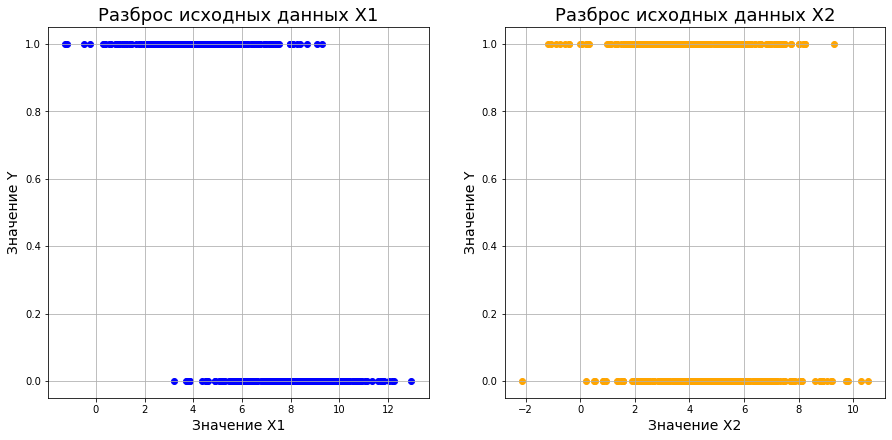

In [53]:
fig,ax=plt.subplots(2, 2, figsize=(15,15))

ax[0,0].scatter(Hw2Part3['X1'], Y, color="blue")
ax[0,0].set_xlabel('Значение X1',fontsize=14)
ax[0,0].set_ylabel('Значение Y',fontsize=14)
ax[0,0].set_title('Разброс исходных данных X1',fontsize=18)

ax[0,1].scatter(Hw2Part3['X2'], Y, color="orange")
ax[0,1].set_xlabel('Значение X2',fontsize=14)
ax[0,1].set_ylabel('Значение Y',fontsize=14)
ax[0,1].set_title('Разброс исходных данных X2',fontsize=18)

fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

График зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств

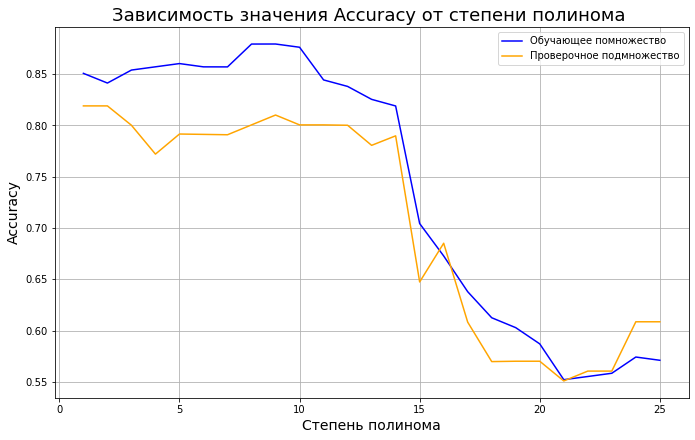

In [54]:
fig,ax=plt.subplots(2, 2, figsize=(25,15))

ax[0,0].plot(range(1,maxvalue+1),accuracy_array_train, color='blue', label='Обучающее помножество')
ax[0,0].plot(range(1,maxvalue+1),accuracy_array, color='orange', label='Проверочное подмножество')
ax[0,0].set_xlabel('Степень полинома',fontsize=14)
ax[0,0].set_ylabel('Accuracy',fontsize=14)
ax[0,0].set_title('Зависимость значения Accuracy от степени полинома ',fontsize=18)
ax[0,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

In [55]:
accuracy_array_itter=[]
accuracy_array_itter_train=[]
maxiter=100
for i in range(1,maxiter+1):
    lgr_itter = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=i, C=1e5, solver='liblinear', random_state=12345)
    lgr_itter.fit(X_train_holdout_poly,y_train_holdout)
    y_pred_holdout = lgr_itter.predict(X_test_holdout_poly)        #на тестовом подмножествe
    y_pred_holdout_train = lgr_itter.predict(X_train_holdout_poly) #на тренировочном подмножествe
    y_pred_test = lgr_itter.predict(X_test_poly)                   #на проверочном подмножествe

    accuracy_array_itter.append(accuracy_score(y_test, y_pred_test))
    accuracy_array_itter_train.append(accuracy_score(y_train_holdout, y_pred_holdout_train))

Value =  {1}


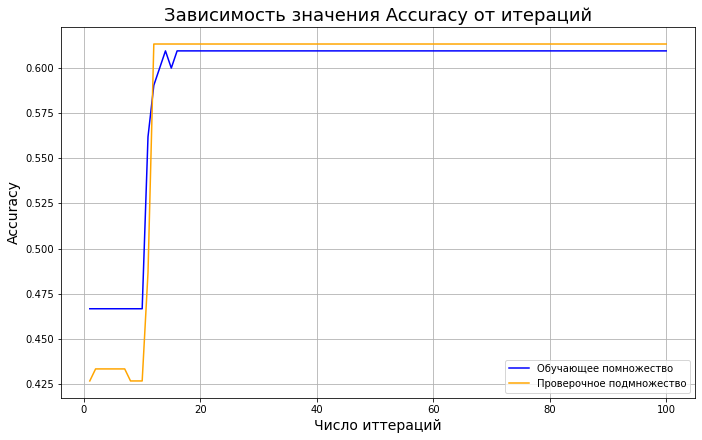

In [56]:
fig,ax=plt.subplots(2, 2, figsize=(25,15))
print ('Value = ',{best_value})

ax[0,0].plot(range(1,maxiter+1),accuracy_array_itter_train, color='blue', label='Обучающее помножество')
ax[0,0].plot(range(1,maxiter+1),accuracy_array_itter, color='orange', label='Проверочное подмножество')
ax[0,0].set_xlabel('Число иттераций',fontsize=14)
ax[0,0].set_ylabel('Accuracy',fontsize=14)
ax[0,0].set_title(f'Зависимость значения Accuracy от итераций',fontsize=18)
ax[0,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

результат классификации для наилучшего случая (степень полинома) для обучающего и тестового подмножеств

In [57]:
X_test_poly=PolynomialFeatures(degree=best_value).fit_transform(X_test)
X_train_holdout_poly=PolynomialFeatures(degree=best_value).fit_transform(X_train_holdout)
X_test_holdout_poly=PolynomialFeatures(degree=best_value).fit_transform(X_test_holdout)

lgr.fit(X_train_holdout_poly, y_train_holdout)
y_pred_holdout = lgr.predict(X_test_holdout_poly)        # предсказание на тестовом подмножествe
y_pred_holdout_train = lgr.predict(X_train_holdout_poly) # предсказание на тренировочном подмножествe
y_pred_test = lgr.predict(X_test_poly)                   # предсказание на проверочном подмножествe

Polynomial logistic regression with degree =  {1}


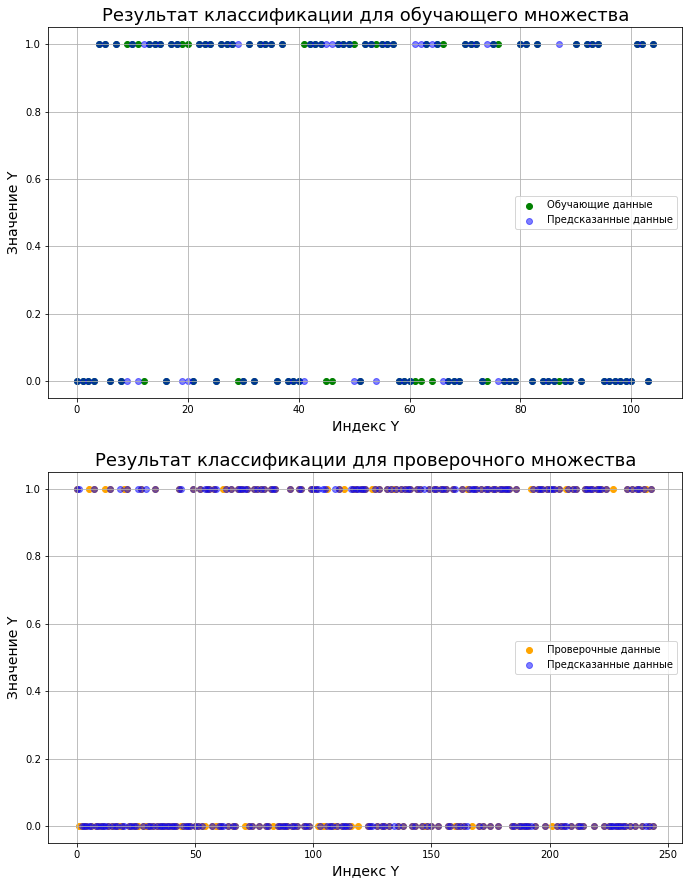

In [58]:
fig,ax=plt.subplots(2, 2, figsize=(25,15))
print ('Polynomial logistic regression with degree = ',{best_value})

ax[0,0].scatter(range(len(y_train_holdout)), y_train_holdout, color="green", label="Обучающие данные")
ax[0,0].scatter(range(len(y_pred_holdout_train)), y_pred_holdout_train, color="blue", alpha=0.5, label="Предсказанные данные")
ax[0,0].set_xlabel('Индекс Y',fontsize=14)
ax[0,0].set_ylabel('Значение Y',fontsize=14)
ax[0,0].set_title(f'Результат классификации для обучающего множества',fontsize=18)
ax[0,0].legend()

ax[1,0].scatter(range(len(y_test_holdout)), y_test_holdout, color="orange", label="Проверочные данные")
ax[1,0].scatter(range(len(y_pred_holdout)), y_pred_holdout, color="blue", alpha=0.5, label="Предсказанные данные")
ax[1,0].set_xlabel('Индекс Y',fontsize=14)
ax[1,0].set_ylabel('Значение Y',fontsize=14)
ax[1,0].set_title(f'Результат классификации для проверочного множества',fontsize=18)
ax[1,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,1])

<strong>ВЫВОД:</strong>
<p> В рамках выполненного задания была использована следующая модель классификации - логистическая регрессия. Качество полиномиальной логистической регрессии выше, чем у обычной. Точность модели зависит от количества иттераций. Недостатки логистической регрессии - при малых степенях полинома происходит недообучение, при больших - переобучение. </p>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 4. Регрессия и регуляризация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="/MLMethods/Assignments/blob/master/data/A2_Model_Selection/regularization.csv">Набор данные</a>

<p dir="auto">Дано множество наблюдений (см. набор данных к заданию), модель - линейная регрессия c L2 регуляризацией. Найти коэффициент регуляризации с минимальной ошибкой на проверочном подмножестве, определить среднеквадратическую ошибку на тестовом подмножестве. Для выбора гиперпараметров использовать кросс-валидацию (параметры см. задание 2). Сделать заключение о влиянии коэффициента регуляризации.</p>

In [59]:
# Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))

Построить:

<ul dir="auto">
<li>матрицу корреляций</li>
<li>график зависимости среднеквадратической ошибки от коэффициента регуляризации для обучающего и проверочного подмножеств</li>
<li>график зависимости R-квадрата от коэффициента регуляризации для обучающего и проверочного подмножеств</li>
<li>график предсказанные значения (<code>y_pred</code>) - действительные значения (<code>y_true</code>) для итоговой модели</li>
</ul>

In [60]:
# Подключение библиотек

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV

In [61]:
url = 'https://raw.githubusercontent.com/MLMethods/Assignments/master/data/A2_Model_Selection/regularization.csv'
res = requests.get(url, allow_redirects=True)
with open('Hw2Part4.csv','wb') as file:
    file.write(res.content)
Hw2Part4 = pd.read_csv('Hw2Part4.csv')
Hw2Part4

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,3.856603,14.873388,57.360757,221.217682,853.148822,3290.256492,1.268921e+04,4.893726e+04,1.887316e+05,7.278629e+05,2.807078e+06,1.082579e+07,4.175077e+07,1.610161e+08,6.209754e+08,2.394856e+09,9.209759
1,0.103760,0.010766,0.001117,0.000116,0.000012,0.000001,1.294799e-07,1.343480e-08,1.393992e-09,1.446402e-10,1.500783e-11,1.557209e-12,1.615756e-13,1.676504e-14,1.739537e-15,1.804939e-16,10.409240
2,3.168241,10.037752,31.802020,100.756468,319.220791,1011.368453,3.204259e+03,1.015187e+04,3.216356e+04,1.019019e+05,3.228498e+05,1.022866e+06,3.240687e+06,1.026728e+07,3.252921e+07,1.030604e+08,7.643742
3,3.744019,14.017681,52.482471,196.495391,735.682558,2754.409777,1.031256e+04,3.861044e+04,1.445582e+05,5.412288e+05,2.026371e+06,7.586773e+06,2.840503e+07,1.063490e+08,3.981726e+08,1.490766e+09,8.453341
4,2.492535,6.212731,15.485450,38.598027,96.206935,239.799159,5.977078e+02,1.489808e+03,3.713398e+03,9.255774e+03,2.307034e+04,5.750364e+04,1.433298e+05,3.572546e+05,8.904697e+05,2.219527e+06,9.317824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4.403960,19.394866,85.414221,376.160841,1656.597410,7295.589233,3.212949e+04,1.414970e+05,6.231471e+05,2.744315e+06,1.208585e+07,5.322562e+07,2.344035e+08,1.032304e+09,4.546225e+09,2.002139e+10,9.510032
296,3.004771,9.028649,27.129023,81.516502,244.938425,735.983886,2.211463e+03,6.644940e+03,1.996652e+04,5.999483e+04,1.802707e+05,5.416723e+05,1.627601e+06,4.890569e+06,1.469504e+07,4.415523e+07,8.615320
297,3.226139,10.407971,33.577559,108.325862,349.474260,1127.452444,3.637318e+03,1.173449e+04,3.785710e+04,1.221323e+05,3.940156e+05,1.271149e+06,4.100903e+06,1.323008e+07,4.268208e+07,1.376983e+08,8.320160
298,0.283141,0.080169,0.022699,0.006427,0.001820,0.000515,1.458880e-04,4.130687e-05,1.169567e-05,3.311523e-06,9.376281e-07,2.654810e-07,7.516855e-08,2.128330e-08,6.026175e-09,1.706257e-09,10.217886


In [62]:
X = Hw2Part4.drop('Y', axis=1).values
Y = Hw2Part4['Y'].values
print (" Размерность Х =", X.shape);
print (" Размерность Y =", Y.shape);

 Размерность Х = (300, 16)
 Размерность Y = (300,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)
ridge=Ridge()

In [64]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=0)

X_train_holdout, X_test_holdout, y_train_holdout, y_test_holdout = train_test_split(X_train, y_train, train_size=0.7, random_state=0)

parameters = {
    "alpha": alphas
}

grid_class_parameters = {
    "estimator": ridge,
    "param_grid": parameters,
    "cv": kfolds,
    "scoring": "neg_mean_squared_error",
    "return_train_score": True
}

ridge_cv = GridSearchCV(ridge,
                        parameters,
                        cv=5,
                        scoring=['neg_mean_squared_error','r2'],
                        refit='neg_mean_squared_error',
                        return_train_score = True)

ridge_cv.fit(X_train_holdout, y_train_holdout) 

y_train_pred_cv = ridge_cv.predict(X_train)            #на тренировочном подмножестве
y_test_pred_cv = ridge_cv.predict(X_test)              #на проверочном подмножестве
y_test_holdout_pred = ridge_cv.predict(X_test_holdout) #на тестовом подмножестве

In [65]:
# Ошибки на обучающем множестве
MSE_train_cv = mean_squared_error(y_train, y_train_pred_cv) 
Rpow2_train_cv = r2_score(y_train, y_train_pred_cv)
print("Обучающее множество:")
print("\t Среднеквадратическая ошибка:", MSE_train_cv)
print("\t R-квадрат:                  ", Rpow2_train_cv)

# Ошибки на проверочном множестве
MSE_test_cv = mean_squared_error(y_test, y_test_pred_cv)
Rpow2_test_cv = r2_score(y_test, y_test_pred_cv)
print("Проверочное множество:")
print("\t Среднеквадратическая ошибка:", MSE_test_cv)
print("\t R-квадрат:                  ", Rpow2_test_cv)

# Ошибки на тестовом множестве
MSE_test_holdout_cv = mean_squared_error(y_test_holdout, y_test_holdout_pred)
Rpow2_test_holdout_cv = r2_score(y_test_holdout, y_test_holdout_pred)
print("Тестовое множество:")
print("\t Среднеквадратическая ошибка:", MSE_test_holdout_cv)
print("\t R-квадрат:                  ", Rpow2_test_holdout_cv)

Обучающее множество:
	 Среднеквадратическая ошибка: 0.2295416846118081
	 R-квадрат:                   0.6727508175541568
Проверочное множество:
	 Среднеквадратическая ошибка: 0.2627755414254505
	 R-квадрат:                   0.6589106637842652
Тестовое множество:
	 Среднеквадратическая ошибка: 0.218945997922775
	 R-квадрат:                   0.6795242757698963


In [66]:
# Вывод сведений по обучению
ridge_cv.cv_results_

{'mean_fit_time': array([0.0014853 , 0.00107689, 0.00123   , 0.00078745, 0.00103083,
        0.00091877, 0.00114036, 0.00107913, 0.000946  , 0.00065894,
        0.00132971, 0.001192  , 0.00114474, 0.00070863, 0.00014095,
        0.00079384, 0.00060725, 0.00076666, 0.00098186, 0.00071201,
        0.00079737]),
 'std_fit_time': array([4.38659978e-04, 5.10303797e-04, 3.56712282e-04, 3.95284211e-04,
        5.56540313e-04, 2.37978462e-04, 3.60402628e-04, 6.37576866e-04,
        6.76301354e-05, 4.18834157e-04, 4.19872580e-04, 3.91175030e-04,
        4.38035461e-04, 3.72496185e-04, 2.81906128e-04, 3.97779249e-04,
        4.96431682e-04, 3.84943925e-04, 3.11380141e-05, 3.87664756e-04,
        3.98684047e-04]),
 'mean_score_time': array([0.00103011, 0.00059495, 0.00076418, 0.00084357, 0.00040255,
        0.00057669, 0.00080872, 0.00072184, 0.00029798, 0.0006021 ,
        0.00052876, 0.00039887, 0.00059853, 0.00079889, 0.00097733,
        0.00078535, 0.00098505, 0.00039868, 0.        , 0.000632

In [67]:
# Параметры лучшей модели
ridge_cv.best_params_

{'alpha': 3.359818286283774}

In [68]:
-ridge_cv.cv_results_["mean_test_neg_mean_squared_error"]

array([0.33644874, 0.30721344, 0.30669703, 0.30616565, 0.30559792,
       0.3048133 , 0.30398981, 0.30340562, 0.30245536, 0.30054543,
       0.29820455, 0.30007485, 0.29901031, 0.29496472, 0.29336492,
       0.29129135, 0.29022342, 0.28791546, 0.28441503, 0.28071267,
       0.30881647])

In [69]:
-ridge_cv.cv_results_["mean_train_neg_mean_squared_error"]

array([0.21859258, 0.2222037 , 0.22242735, 0.22266712, 0.2228783 ,
       0.22305313, 0.22333493, 0.22373861, 0.22407141, 0.22434722,
       0.22471101, 0.22550861, 0.22589466, 0.22647343, 0.22715108,
       0.22764018, 0.22799515, 0.22883418, 0.22852057, 0.22884599,
       0.24876606])

In [70]:
log_alphas = np.log10(np.asarray(alphas, dtype="float"))

Построить матрицу корреляций

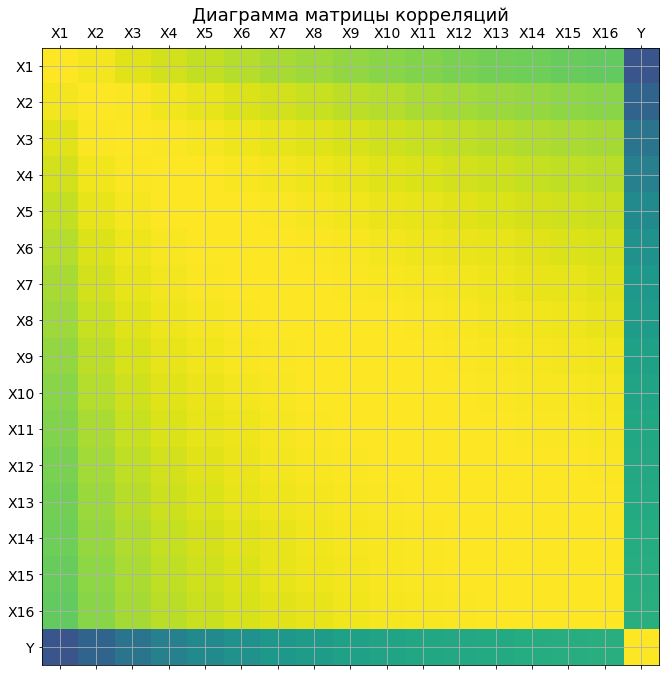

In [71]:
fig,ax=plt.subplots(2, 2, figsize=(25,25))
corr = Hw2Part4.corr()
ax[0,0].matshow(corr, vmin=-1, vmax=1)
ax[0,0].set_yticks(ticks=range(len(corr.index)))
ax[0,0].set_yticklabels(labels=corr.index, fontsize=14)
ax[0,0].set_xticks(ticks=range(len(corr.index)))
ax[0,0].set_xticklabels(labels=corr.index, fontsize=14)
ax[0,0].set_title('Диаграмма матрицы корреляций',fontsize=18)
ax[0,0].grid(True)

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

график зависимости среднеквадратической ошибки от коэффициента регуляризации для обучающего и проверочного подмножеств

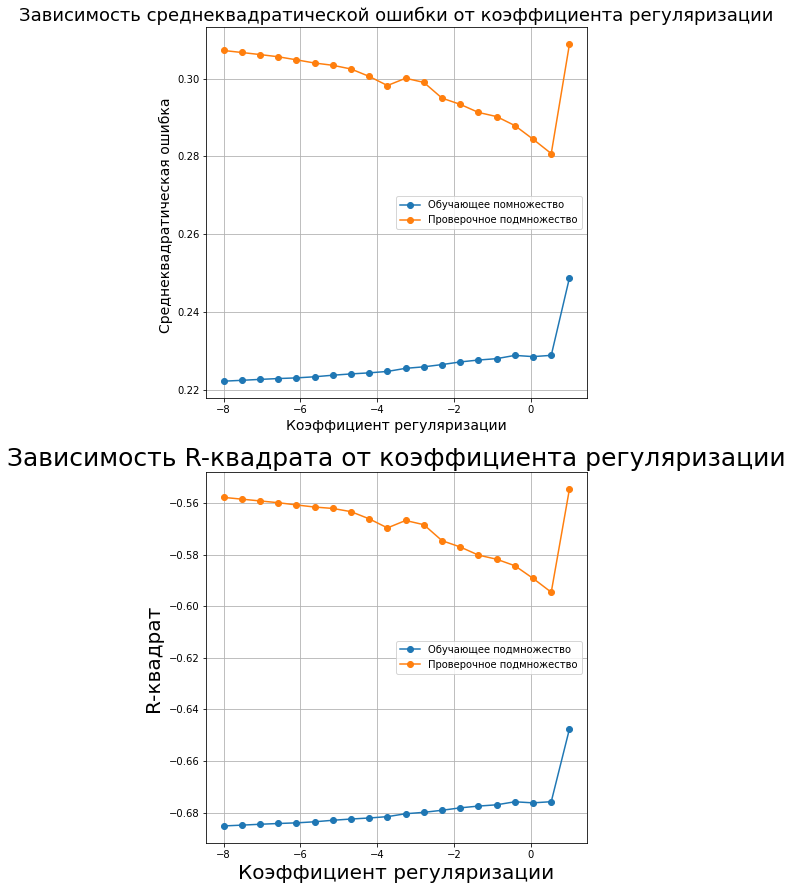

In [72]:
fig,ax=plt.subplots(2, 2, figsize=(15,15))

ax[0,0].plot(log_alphas, -ridge_cv.cv_results_["mean_train_neg_mean_squared_error"], "o-", label="Обучающее помножество")
ax[0,0].plot(log_alphas, -ridge_cv.cv_results_["mean_test_neg_mean_squared_error"], "o-", label="Проверочное подмножество")
ax[0,0].set_xlabel('Коэффициент регуляризации',fontsize=14)
ax[0,0].set_ylabel('Среднеквадратическая ошибка ',fontsize=14)
ax[0,0].set_title('Зависимость среднеквадратической ошибки от коэффициента регуляризации',fontsize=18)
ax[0,0].grid(True)
ax[0,0].legend()


ax[1,0].plot(log_alphas, -ridge_cv.cv_results_["mean_train_r2"], "o-", label="Обучающее подмножество")
ax[1,0].plot(log_alphas, -ridge_cv.cv_results_["mean_test_r2"], "o-", label="Проверочное подмножество")
ax[1,0].set_xlabel('Коэффициент регуляризации',fontsize=20)
ax[1,0].set_ylabel('R-квадрат ',fontsize=20)
ax[1,0].set_title('Зависимость R-квадрата от коэффициента регуляризации',fontsize=25)
ax[1,0].grid(True)
ax[1,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,1])

График для итоговой модели

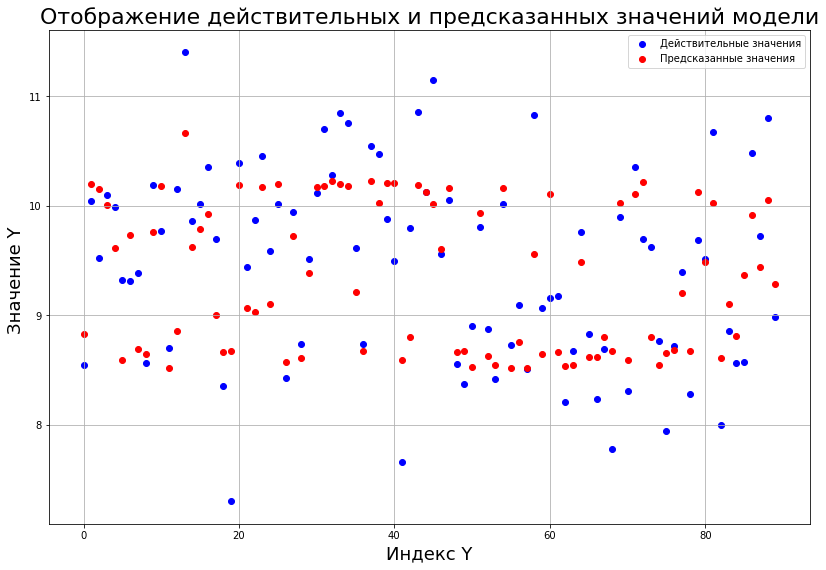

In [73]:
fig,ax=plt.subplots(2, 2, figsize=(30,20))

ax[0,0].scatter(range(len(y_test)), y_test, color='blue', label="Действительные значения")
ax[0,0].scatter(range(len(y_test_pred_cv)), y_test_pred_cv, color='red', label="Предсказанные значения")
ax[0,0].set_xlabel('Индекс Y',fontsize=18)
ax[0,0].set_ylabel('Значение Y ',fontsize=18)
ax[0,0].set_title('Отображение действительных и предсказанных значений модели',fontsize=22)
ax[0,0].grid(True)
ax[0,0].legend()

fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

<strong>ВЫВОД:</strong>
<p> Полученная модель линейной регрессии с L2-регуляризацией (с помощью Ridge) на исходных данных имеет лучшее качество, чем без регуляризациии. Регуляризация позволяет улучшить качество модели из-за того что она запрещает иметь слишком резкие изгибы на графике, предотвращая переобучение </p>